In [1]:
import numpy as np       # linear algebra
import pandas as pd      # data processing (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from math import floor,ceil,sqrt
import datetime as dt
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('COALINDIA.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2598 non-null   object 
 1   Symbol              2598 non-null   object 
 2   Series              2598 non-null   object 
 3   Prev Close          2598 non-null   float64
 4   Open                2598 non-null   float64
 5   High                2598 non-null   float64
 6   Low                 2598 non-null   float64
 7   Last                2598 non-null   float64
 8   Close               2598 non-null   float64
 9   VWAP                2598 non-null   float64
 10  Volume              2598 non-null   int64  
 11  Turnover            2598 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2598 non-null   int64  
 14  %Deliverble         2598 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 304.6

In [4]:
df.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.drop(columns=['Trades', 'Deliverable Volume','%Deliverble'], inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14


In [6]:
df.drop(columns=['Symbol','Series','Turnover'],axis=1,inplace=True)
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2010-11-04,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245
1,2010-11-05,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173
2,2010-11-08,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779
3,2010-11-09,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956
4,2010-11-10,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129


Text(0.5, 1.0, 'Stock Price of COALINDIA over the Years')

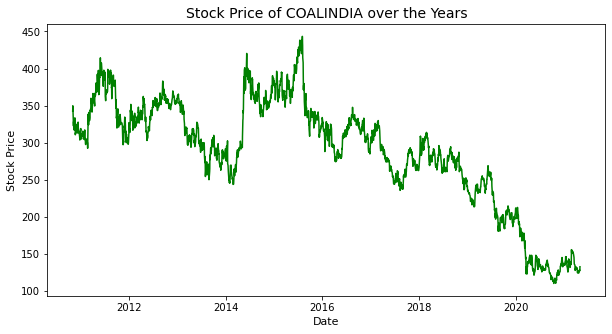

In [7]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=11)
plt.ylabel('Stock Price',size=11)
plt.title('Stock Price of COALINDIA over the Years',size=14)

--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------
Shape of Training Set (1949, 1)
Shape of Validation Set (649, 1)
RMSE value on validation set: 108.14322528524677


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7452\2156681852.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] =

Accuracy is: Close    38.850311
dtype: float64


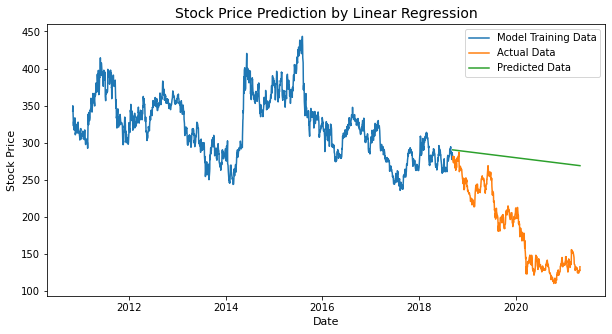

In [8]:
from sklearn.linear_model import LinearRegression
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('--------STOCK PRICE PREDICTION BY LINEAR REGRESSION--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Linear Regression',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

-----STOCK PRICE PREDICTION BY RandomForestRegressor-------
Shape of Training Set (1949, 1)
Shape of Validation Set (649, 1)
RMSE value on validation set: 110.16520563661092
Accuracy is: Close    37.70698
dtype: float64
Accuracy is: Close    37.70698
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7452\1525380345.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] =

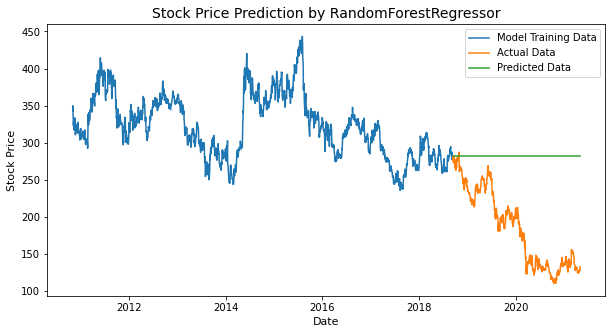

In [10]:
from sklearn.ensemble import RandomForestRegressor
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----STOCK PRICE PREDICTION BY RandomForestRegressor-------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(np.array(x_train).reshape(-1, 1),(y_train.values.ravel()))
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by RandomForestRegressor',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


linear_regression_prediction(df)

------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------
Shape of Training Set (1949, 1)
Shape of Validation Set (649, 1)
RMSE value on validation set: 146.70433102511126
Accuracy is: Close    17.045897
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7452\785950157.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = 

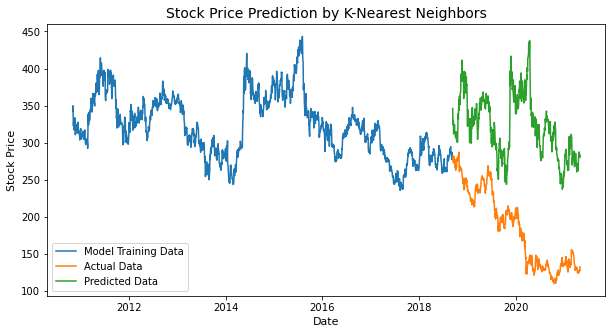

In [11]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS--------')
    print('===========================================================')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    y_range = np.max(y_valid)-np.min(y_valid)
    accuracy= (1-(rms/y_range))*100
    print("Accuracy is:",accuracy)
    print('===========================================================')
    valid_set['Predictions'] = preds
    plt.figure(figsize=(10,5))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

k_nearest_neighbours_predict(df)

--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--
Shape of Training Set (1949, 1)
Shape of Validation Set (649, 1)
1909/1909 - 41s - loss: 0.0025 - 41s/epoch - 22ms/step
21/21 [==============================] - 2s 12ms/step


C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Hp\AppData\Local\Temp\ipykernel_7452\4267124087.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


RMSE value on validation set: Close    7.497043
dtype: float64
Accuracy percentage: Close    97.396439
dtype: float64


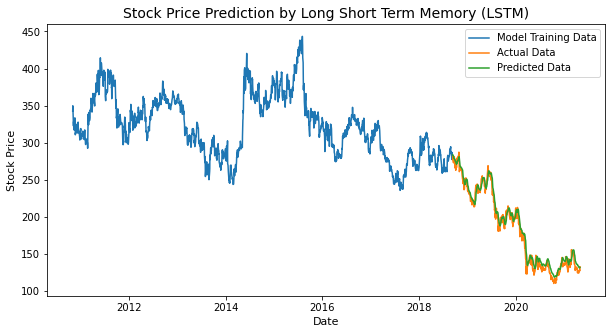

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('--STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)--')
    print('===========================================================')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    accuracy_percentage = (1 - rms/np.mean(df['Close'])) * 100
    print('Accuracy percentage:', accuracy_percentage)

    print('===========================================================')
    valid['Predictions'] = closing_price
    plt.figure(figsize=(10,5))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=11)
    plt.ylabel('Stock Price',size=11)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=14)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



lstm_prediction(df)